# PHQ-9

In [38]:
import pandas as pd

# Load the data from the CSV file
file_path = './survey/PHQ-9.csv'
phq_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its columns to understand its structure
phq_data.head(), phq_data.columns

(   uid type Little interest or pleasure in doing things  \
 0  u00  pre                                  Not at all   
 1  u01  pre                                Several days   
 2  u02  pre                     More than half the days   
 3  u03  pre                                  Not at all   
 4  u04  pre                                Several days   
 
   Feeling down, depressed, hopeless.  \
 0                       Several days   
 1                       Several days   
 2                       Several days   
 3                       Several days   
 4                       Several days   
 
   Trouble falling or staying asleep, or sleeping too much.  \
 0                                         Not at all         
 1                                       Several days         
 2                            More than half the days         
 3                                         Not at all         
 4                                         Not at all         
 
   Feeling

In [39]:
for column in phq_data.columns[2:5]:  # Check first three survey columns
    print(f"Unique values in {column}: {phq_data[column].astype(str).str.strip().str.title().unique()}")
    
response_mapping = {
    'Not At All': 0,
    'Several Days': 1,
    'More Than Half The Days': 2,
    'Nearly Every Day': 3
}

for column in phq_data.columns[2:]:  # Assuming first two columns are 'uid' and 'type'
    phq_data[column] = phq_data[column].astype(str).str.title().map(response_mapping)

Unique values in Little interest or pleasure in doing things: ['Not At All' 'Several Days' 'More Than Half The Days' 'Nearly Every Day']
Unique values in Feeling down, depressed, hopeless.: ['Several Days' 'Not At All' 'More Than Half The Days' 'Nearly Every Day']
Unique values in Trouble falling or staying asleep, or sleeping too much.: ['Not At All' 'Several Days' 'More Than Half The Days' 'Nearly Every Day']


In [40]:
print("NaN counts after mapping:")
print(phq_data.isna().sum())

NaN counts after mapping:
uid                                                                                                                                                                       0
type                                                                                                                                                                      0
Little interest or pleasure in doing things                                                                                                                               0
Feeling down, depressed, hopeless.                                                                                                                                        0
Trouble falling or staying asleep, or sleeping too much.                                                                                                                  0
Feeling tired or having little energy                                                                             

In [41]:
print("Unique 'type' values before adjustment:", phq_data['type'].unique())

# Normalize 'type' field for consistency
phq_data['type'] = phq_data['type'].str.strip().str.title()

# Verify 'uid' consistency and format
print("Unique 'uid' values check (sample):", phq_data['uid'].sample(5))

# Identify participants who have both Pre and Post data
pre_participants = set(phq_data[phq_data['type'] == 'Pre']['uid'])
post_participants = set(phq_data[phq_data['type'] == 'Post']['uid'])
common_participants = pre_participants & post_participants

print(f"Number of participants in Pre only: {len(pre_participants)}")
print(f"Number of participants in Post only: {len(post_participants)}")
print(f"Number of common participants: {len(common_participants)}")

# Filter datasets to only include common participants
pre_data = phq_data[(phq_data['type'] == 'Pre') & (phq_data['uid'].isin(common_participants))]
post_data = phq_data[(phq_data['type'] == 'Post') & (phq_data['uid'].isin(common_participants))]

# Save the filtered data
pre_data.to_csv('./data/PHQ-9/PHQ-9_Pre.csv', index=False)
post_data.to_csv('./data/PHQ-9/PHQ-9_Post.csv', index=False)

# Check final data counts
print("Final Pre data counts (non-NaN):")
print(pre_data.count())
print("\nFinal Post data counts (non-NaN):")
print(post_data.count())

Unique 'type' values before adjustment: ['pre' 'post']
Unique 'uid' values check (sample): 46    u00
19    u22
41    u53
79    u52
54    u10
Name: uid, dtype: object
Number of participants in Pre only: 46
Number of participants in Post only: 38
Number of common participants: 38
Final Pre data counts (non-NaN):
uid                                                                                                                                                                      38
type                                                                                                                                                                     38
Little interest or pleasure in doing things                                                                                                                              38
Feeling down, depressed, hopeless.                                                                                                                                       38


In [42]:
# Calculate the total score for each participant
pre_data['total_score'] = pre_data.iloc[:, 2:].sum(axis=1)
post_data['total_score'] = post_data.iloc[:, 2:].sum(axis=1)

# Save the total scores
pre_data.to_csv('./data/PHQ-9/PHQ-9_Pre.csv', index=False)
post_data.to_csv('./data/PHQ-9/PHQ-9_Post.csv', index=False)


/Users/sreejanpatel/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sreejanpatel/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
# Calculate the mean,median,mode,SD total score for each group

pre_mean = pre_data['total_score'].mean()
post_mean = post_data['total_score'].mean()
pre_median = pre_data['total_score'].median()
post_median = post_data['total_score'].median()
pre_mode = pre_data['total_score'].mode()
post_mode = post_data['total_score'].mode()
pre_sd = pre_data['total_score'].std()
post_sd = post_data['total_score'].std()

print(f"Pre Mean: {pre_mean}")
print(f"Post Mean: {post_mean}")
print(f"Pre Median: {pre_median}")
print(f"Post Median: {post_median}")
print(f"Pre Mode: {pre_mode}")
print(f"Post Mode: {post_mode}")
print(f"Pre Standard Deviation: {pre_sd}")
print(f"Post Standard Deviation: {post_sd}")

Pre Mean: 5.815789473684211
Post Mean: 6.2631578947368425
Pre Median: 5.0
Post Median: 4.5
Pre Mode: 0    5.0
dtype: float64
Post Mode: 0    4.0
1    8.0
dtype: float64
Pre Standard Deviation: 4.837104691064545
Post Standard Deviation: 5.838753155154608


## Visualisation of Data

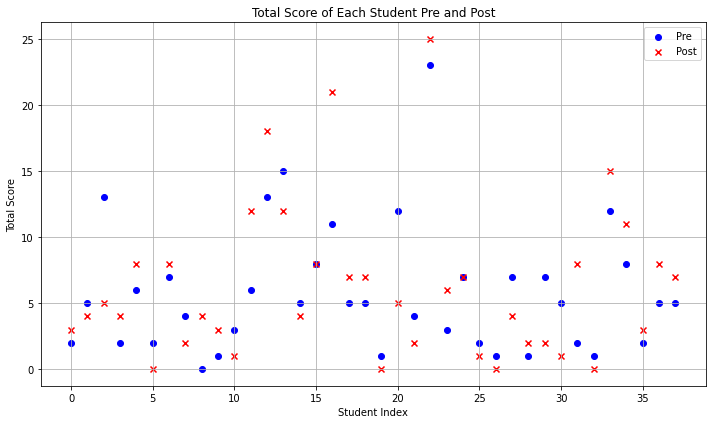

In [44]:
import matplotlib.pyplot as plt

# Load the pre and post datasets
pre_data = pd.read_csv('./data/PHQ-9/PHQ-9_Pre.csv')
post_data = pd.read_csv('./data/PHQ-9/PHQ-9_Post.csv')

# Plot the total score for each student pre and post
plt.figure(figsize=(10, 6))

# Plot pre data
plt.scatter(pre_data.index, pre_data['total_score'], label='Pre', color='blue', marker='o')

# Plot post data
plt.scatter(post_data.index, post_data['total_score'], label='Post', color='red', marker='x')

# Add labels and title
plt.xlabel('Student Index')
plt.ylabel('Total Score')
plt.title('Total Score of Each Student Pre and Post')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Pre and Post

In [45]:
import pandas as pd
from scipy import stats
from scipy.stats import wilcoxon

# Load the pre and post survey data from separate CSV files
pre_data = pd.read_csv('./data/PHQ-9/PHQ-9_Pre.csv')
post_data = pd.read_csv('./data/PHQ-9/PHQ-9_Post.csv')

# Merge the pre and post survey data on the 'uid' column
merged_data = pd.merge(pre_data, post_data, on='uid', suffixes=('_pre', '_post'))

# Calculate the difference between post and pre total scores
merged_data['score_diff'] = merged_data['total_score_post'] - merged_data['total_score_pre']

stat_pre, p_pre = stats.shapiro(merged_data['total_score_pre'])
stat_post, p_post = stats.shapiro(merged_data['total_score_post'])

print(f"Pre data normality test: statistic={stat_pre}, p-value={p_pre}")
print(f"Post data normality test: statistic={stat_post}, p-value={p_post}")

# Perform wilcoxon signed-rank test
statistic, p_value = wilcoxon(merged_data['total_score_post'], merged_data['total_score_pre'])

print(f"T-statistic: {statistic}, p-value: {p_value}")

Pre data normality test: statistic=0.8622614145278931, p-value=0.0002577931445557624
Post data normality test: statistic=0.8532085418701172, p-value=0.00015543548215646297
T-statistic: 274.0, p-value: 0.35080329754782624
